Q1 B. Handling missing value

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


In [ ]:
# Q1. Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and (d) Airbags from the following: ordinal/nominal/ratio/interval scale.
# a) Model - Nominal
# b) Type - Nominal
# c) Max. Price - Ratio
# d) Airbags - Nominal


In [101]:
ds_cars = pd.read_csv("../datasets/Cars93.csv")
ds_cars.head(3)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA


In [102]:
ds_cars.shape

(93, 26)

In [103]:
ds_cars.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               34
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64

In [104]:
ds_cars.isnull().sum().sum()

np.int64(47)

In [105]:
(ds_cars.isnull().sum().sum() / (ds_cars.shape[0] * ds_cars.shape[1])) * 100

np.float64(1.943755169561621)

In [106]:
(ds_cars.isnull().sum() / (ds_cars.shape[0])) * 100

Manufacturer           0.000000
Model                  0.000000
Type                   0.000000
Min.Price              0.000000
Price                  0.000000
Max.Price              0.000000
MPG.city               0.000000
MPG.highway            0.000000
AirBags               36.559140
DriveTrain             0.000000
Cylinders              0.000000
EngineSize             0.000000
Horsepower             0.000000
RPM                    0.000000
Rev.per.mile           0.000000
Man.trans.avail        0.000000
Fuel.tank.capacity     0.000000
Passengers             0.000000
Length                 0.000000
Wheelbase              0.000000
Width                  0.000000
Turn.circle            0.000000
Rear.seat.room         2.150538
Luggage.room          11.827957
Weight                 0.000000
Origin                 0.000000
dtype: float64

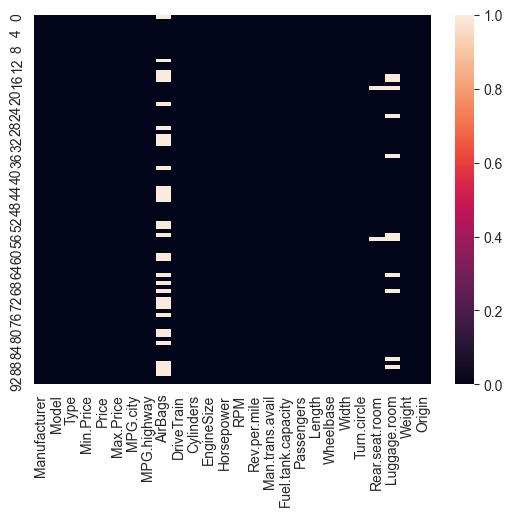

In [107]:
sns.heatmap(ds_cars.isnull())
plt.show()

In [108]:
ds_cars['AirBags'].mode()

0    Driver only
Name: AirBags, dtype: object

In [109]:
ds_cars["AirBags"].mode()[0]
ds_cars['AirBags']

0                    NaN
1     Driver & Passenger
2            Driver only
3     Driver & Passenger
4            Driver only
             ...        
88                   NaN
89                   NaN
90                   NaN
91           Driver only
92    Driver & Passenger
Name: AirBags, Length: 93, dtype: object

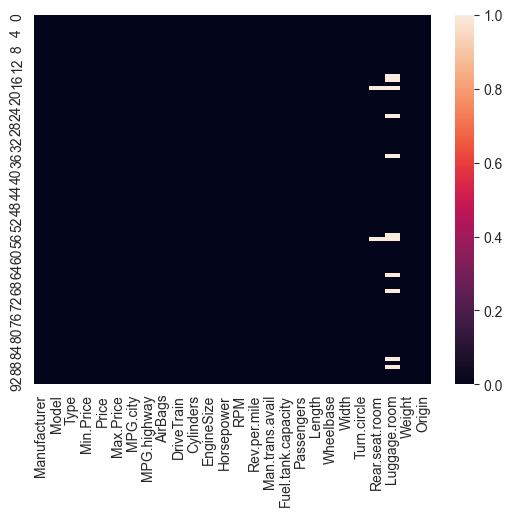

In [13]:
# Further check NA value in other columns with numerical field
ds_cars.select_dtypes(include="float64").isnull().sum()

Min.Price              0
Price                  0
Max.Price              0
EngineSize             0
Fuel.tank.capacity     0
Rear.seat.room         2
Luggage.room          11
dtype: int64

In [14]:
ds_cars_copy.select_dtypes(include="float64").columns


Index(['Min.Price', 'Price', 'Max.Price', 'EngineSize', 'Fuel.tank.capacity',
       'Rear.seat.room', 'Luggage.room'],
      dtype='object')

In [15]:
ds_cars_copy.head(3)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,No AirBag,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA


In [ ]:
## df = pd.DataFrame(ds_cars.select_dtypes(include="float64").columns)

In [16]:
ds_cars_copy.select_dtypes(include="float64").isnull().sum()

Min.Price              0
Price                  0
Max.Price              0
EngineSize             0
Fuel.tank.capacity     0
Rear.seat.room         2
Luggage.room          11
dtype: int64

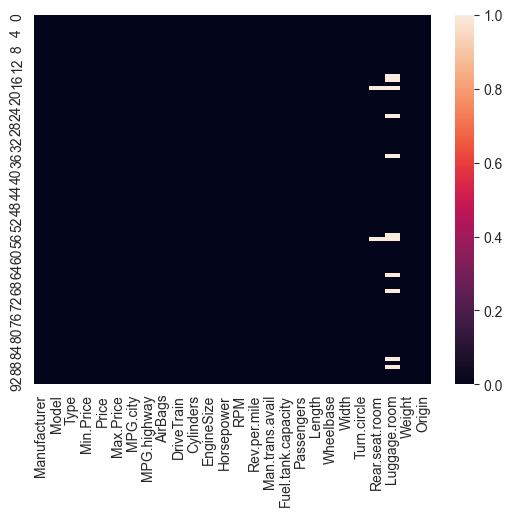

In [17]:
sns.heatmap(ds_cars_copy.isnull())
plt.show()

Handling missing values in column: AirBags
Handling missing values in column: Rear.seat.room
Handling missing values in column: Luggage.room


<Axes: >

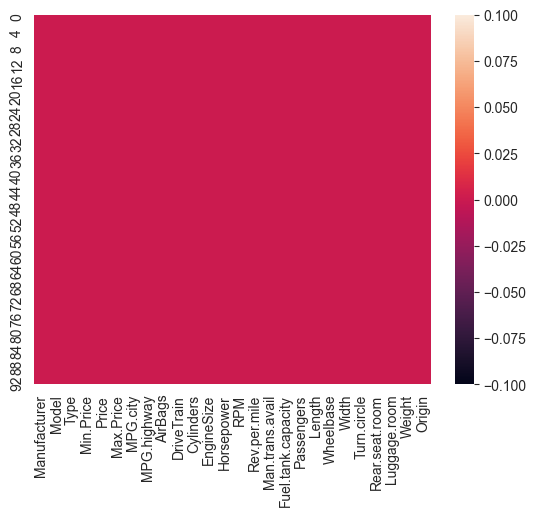

In [134]:
# Q2. Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).
def handle_missing_values(df):
    df_copy = df.copy()  # To avoid modifying the original DataFrame
    col_impute = []
    for col in df_copy.columns:
        if df_copy[col].isnull().any():  # Check if there are any missing values in the column
            print(f"Handling missing values in column: {col}")

            if pd.api.types.is_numeric_dtype(df_copy[col]):
                col_impute.append(col)  # Correct assignment
    si = SimpleImputer(strategy="mean")
    df_copy[col_impute] = si.fit_transform(df_copy[col_impute])
    return df_copy

## impute non numeric values with mode
ds_cars_copy = handle_missing_values(ds_cars)

## Fill AirBag na values with No AirBag
ds_cars_copy['AirBags'] = ds_cars_copy['AirBags'].fillna('No AirBag')
sns.heatmap(ds_cars_copy.isnull())



In [19]:
from sklearn.impute import SimpleImputer

In [20]:
si = SimpleImputer(strategy="mean")
new_data = si.fit_transform(ds_cars_copy[['Rear.seat.room', 'Luggage.room']])

In [21]:
new_data_df = pd.DataFrame(new_data, columns=['Rear.seat.room', 'Luggage.room'])
ds_cars_copy[['Rear.seat.room', 'Luggage.room']] = new_data_df[['Rear.seat.room', 'Luggage.room']]
print(ds_cars_copy.isnull().sum())


Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
dtype: int64


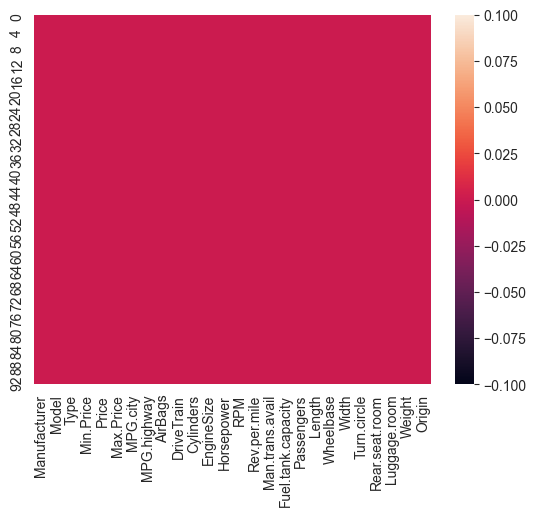

In [22]:
sns.heatmap(ds_cars_copy.isnull())
plt.show()

Removing Noise

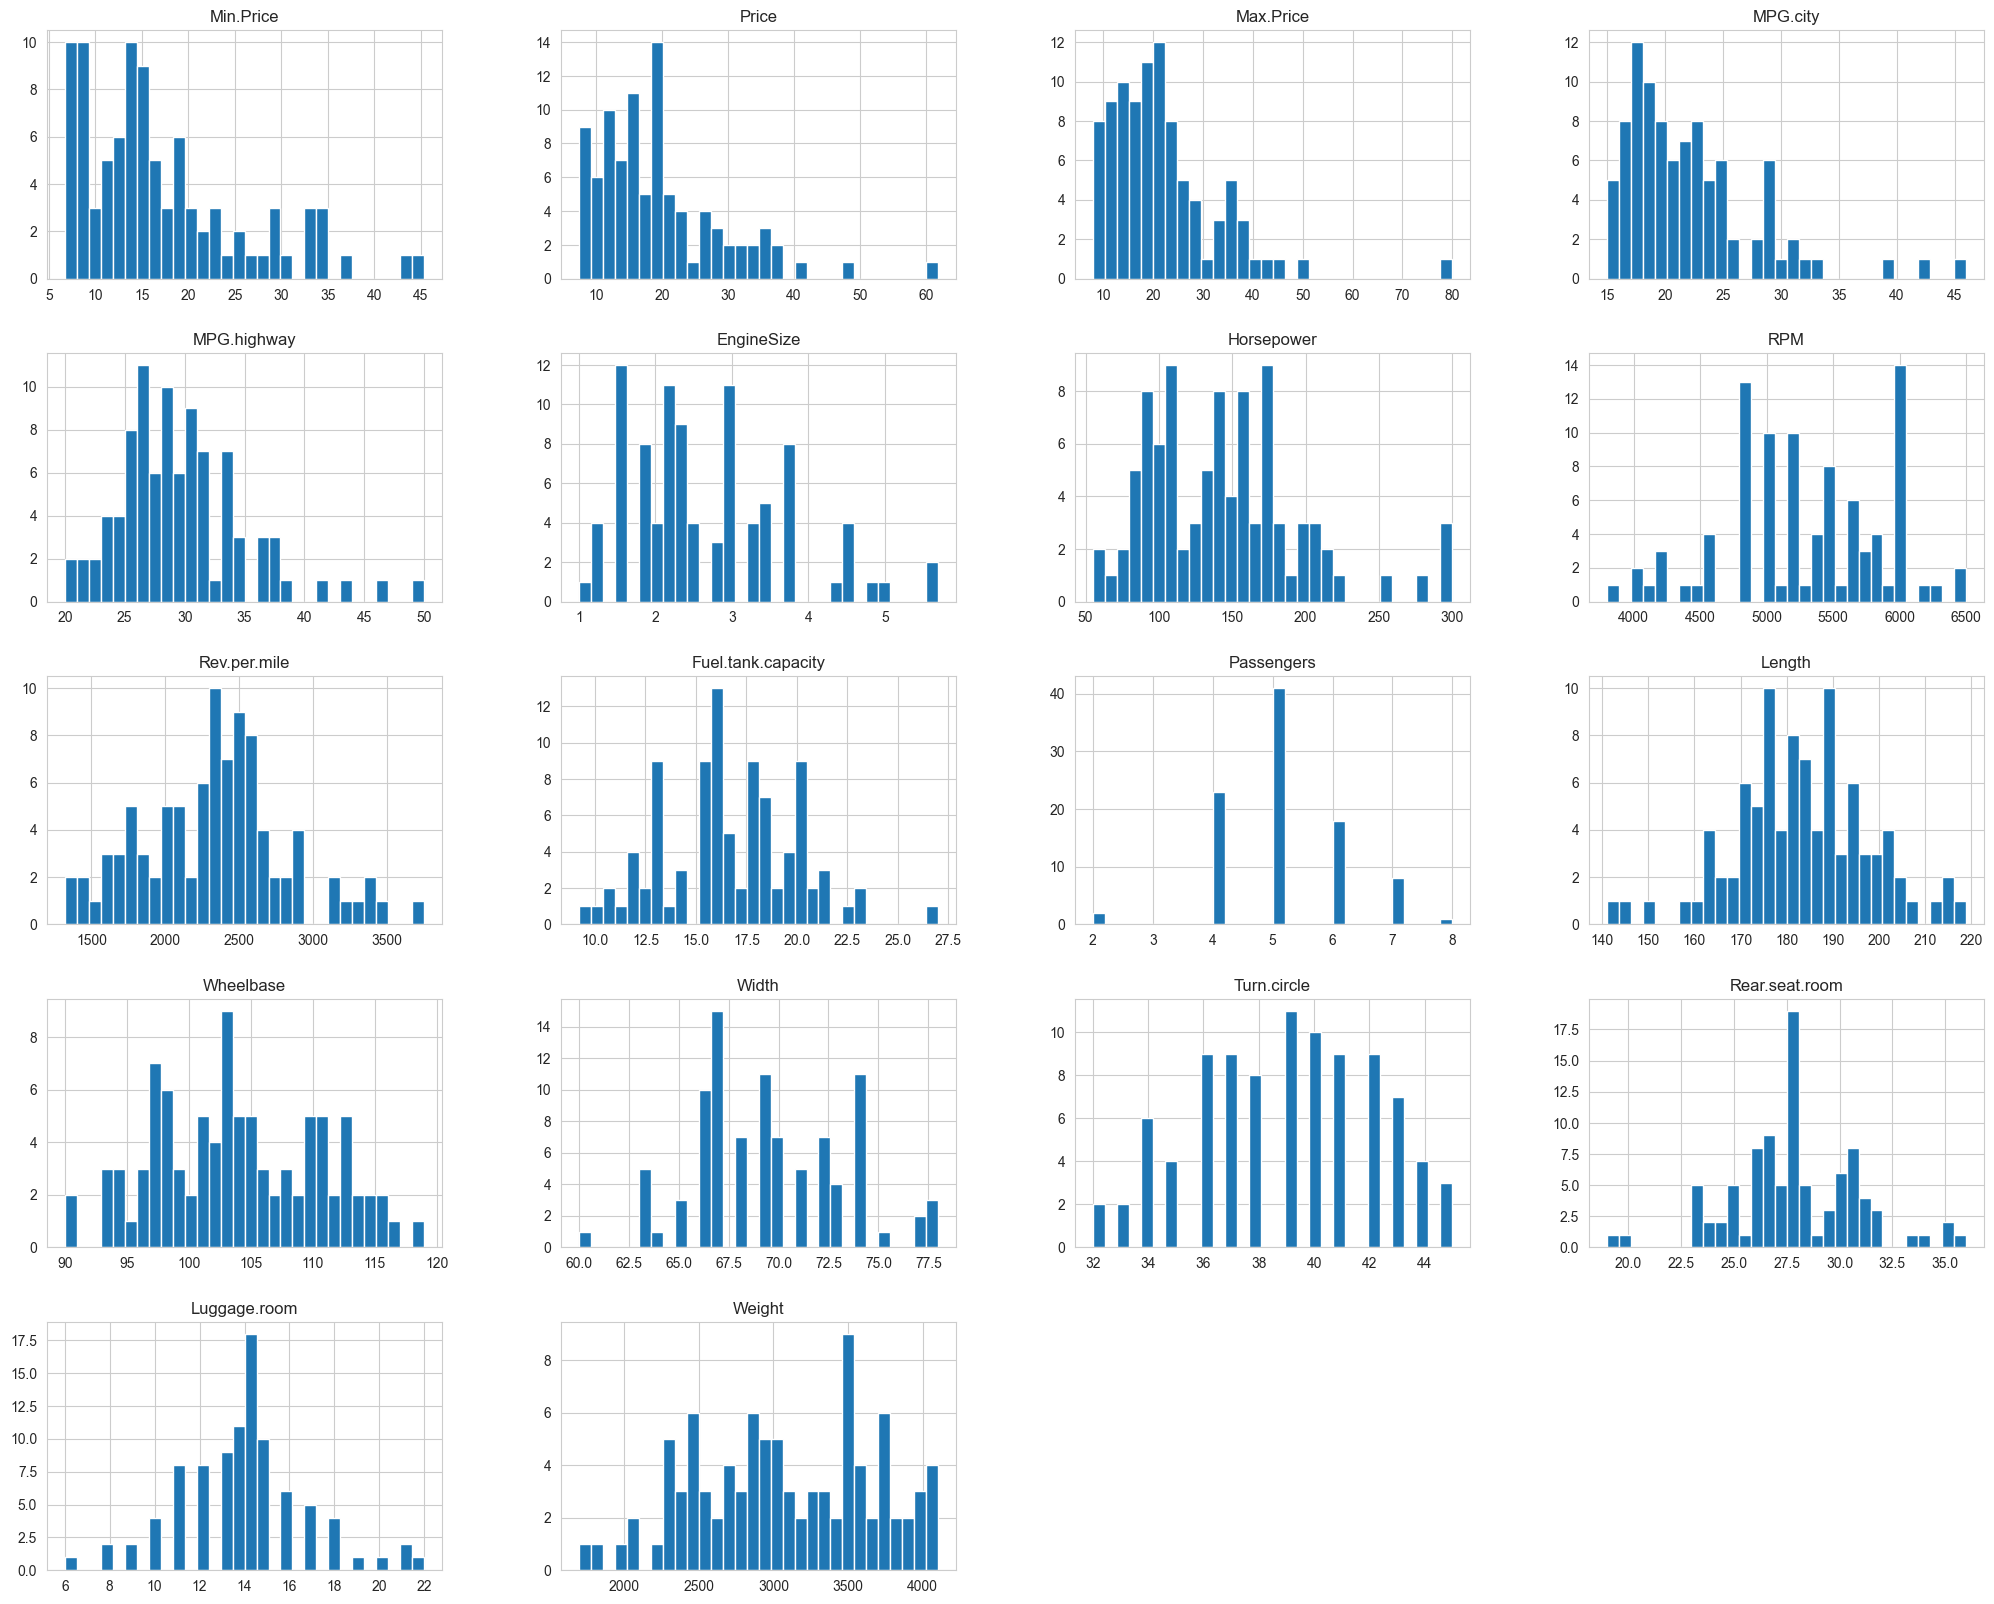

In [21]:
## ploting the data to identify the outliers/Noisy columns

ds_cars_copy.hist(bins=30, figsize=(25, 20))
plt.show()

In [23]:
ds_cars_copy.describe()  ## identifying the outliers by comparing min, max and mean

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.956404,2.813037,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


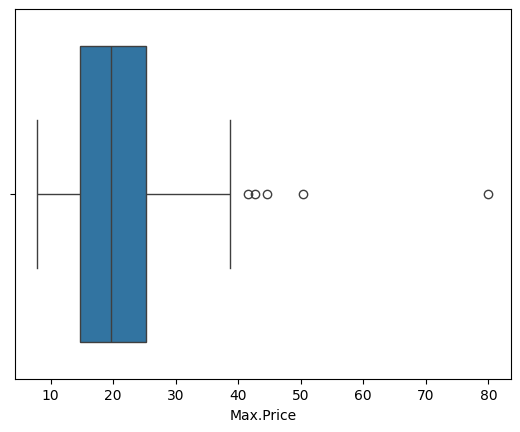

In [ ]:
sns.boxplot(x="Max.Price", data=ds_cars)
plt.show()

In [24]:
ds_cars.shape

(93, 26)

In [25]:
q1 = ds_cars["Min.Price"].quantile(0.25)
q3 = ds_cars["Min.Price"].quantile(0.75)


In [26]:
IQR = q3 - q1

In [27]:
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)

min_range, max_range

(np.float64(-3.4499999999999993), np.float64(34.55))

In [28]:
nw_ds = ds_cars[ds_cars["Max.Price"] <= max_range]  ## Removing outliers using IQR method

In [29]:
nw_ds.shape

(80, 26)

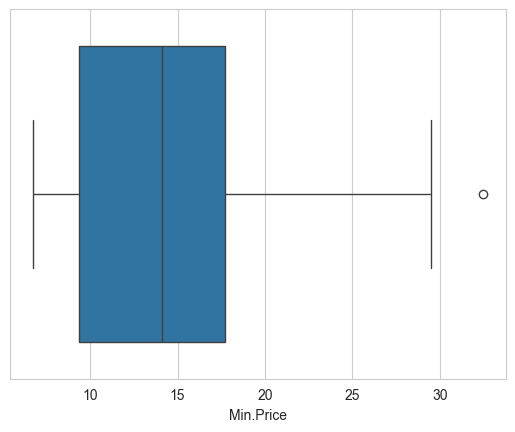

In [30]:
sns.boxplot(x="Min.Price", data=nw_ds)
plt.show()

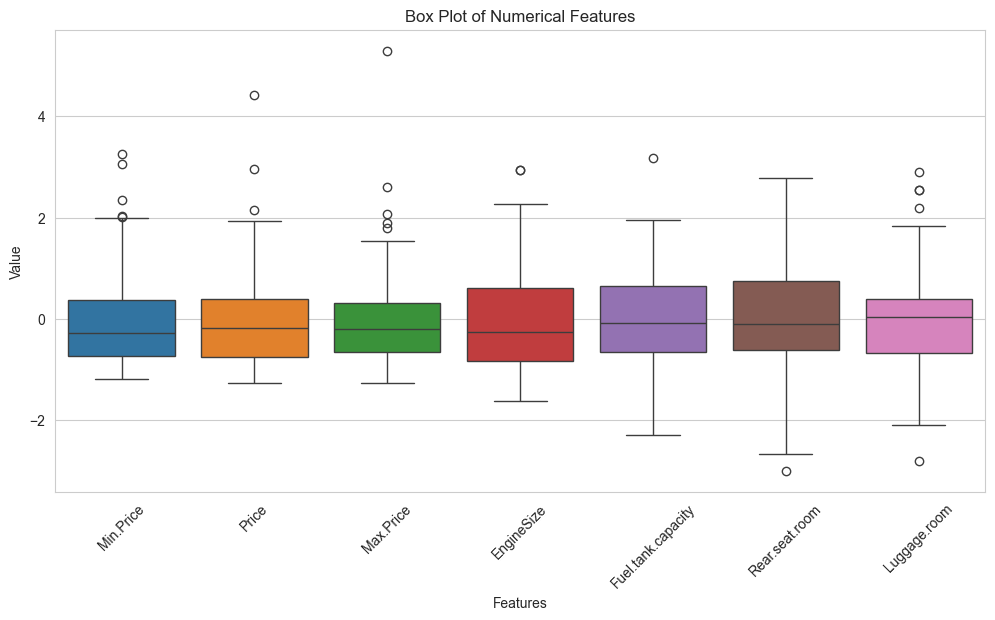

In [74]:
## Checking the outliers for all the columns after data scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(ds_cars_copy)
ds_cars_scaled = scaler.fit_transform(ds_cars_copy.select_dtypes(include="float64"))
ds_cars_scaled_df = pd.DataFrame(ds_cars_scaled, columns=ds_cars_copy.select_dtypes(include="float64").columns)



object_cols = ds_cars.select_dtypes(include="float64").columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=ds_cars_scaled_df[object_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.ylabel("Value")
plt.xlabel("Features")
plt.show()

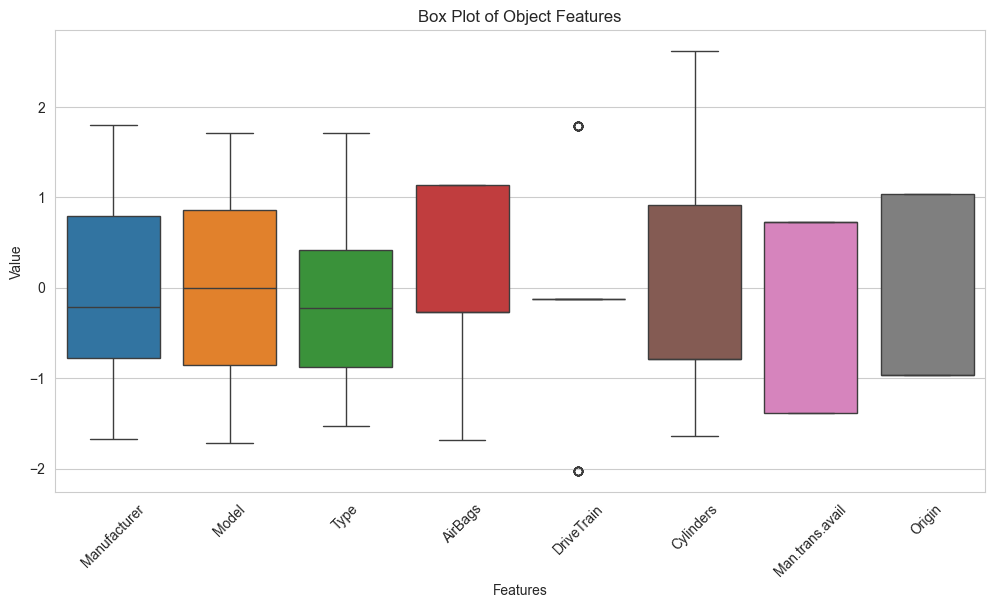

In [48]:
# select the column which has string as datatype
from sklearn.preprocessing import OrdinalEncoder
ds_cars_copy.select_dtypes(include="object")
encoder = OrdinalEncoder()
ds_cars_encode = encoder.fit_transform(ds_cars_copy.select_dtypes(include="object"))
ds_cars_encoded_df = pd.DataFrame(ds_cars_encode, columns=ds_cars_copy.select_dtypes(include="object").columns)
# encode


ds_cars_scaled = scaler.fit_transform(ds_cars_encoded_df)
ds_cars_scaled_encoded_df = pd.DataFrame(ds_cars_scaled, columns=ds_cars_copy.select_dtypes(include="object").columns)

object_cols = ds_cars.select_dtypes(include="object").columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=ds_cars_scaled_encoded_df[object_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Object Features")
plt.ylabel("Value")
plt.xlabel("Features")
plt.show()


In [70]:
# 4. Write a function to encode all the categorical features in the dataset according to the type of variable jointly.

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df, nominal_features=None, ordinal_features=None):
    """
    Encodes categorical features in a dataset based on their type (nominal or ordinal).

    Parameters:
        df (pd.DataFrame): The input dataset.
        nominal_features (list): List of nominal feature names.
        ordinal_features (dict): Dictionary of ordinal feature names and their categories in order.

    Returns:
        pd.DataFrame: Dataset with encoded categorical features.
    """

    df_encoded = df.copy()

    # Label Encoding for nominal features
    if nominal_features:
        label_encoder = LabelEncoder()
        for feature in nominal_features:
            df_encoded[feature] = label_encoder.fit_transform(df_encoded[feature])

    # Ordinal Encoding for ordinal features
    if ordinal_features:
        for feature, categories in ordinal_features.items():
            ordinal_encoder = OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=-1)
            df_encoded[feature] = ordinal_encoder.fit_transform(df_encoded[[feature]]).flatten()

    return df_encoded


# Define nominal and ordinal features
nominal_features = ["Manufacturer", "Type"]
ordinal_features = {
    "Cylinders": ["3", "4", "5", "6", "8"],  # Ordered categories
    "DriveTrain": ["4WD", "Front", "Rear"]   # Ordered categories
}

# Encode categorical features
encoded_data = encode_categorical_features(ds_cars_copy, nominal_features, ordinal_features)
print(encoded_data)



    Manufacturer    Model  Type  Min.Price  Price  Max.Price  MPG.city  \
0              0  Integra     3       12.9   15.9       18.8        25   
1              0   Legend     2       29.2   33.9       38.7        18   
2              1       90     0       25.9   29.1       32.3        20   
3              1      100     2       30.8   37.7       44.6        19   
4              2     535i     2       23.7   30.0       36.2        22   
..           ...      ...   ...        ...    ...        ...       ...   
88            30  Eurovan     5       16.6   19.7       22.7        17   
89            30   Passat     0       17.6   20.0       22.4        21   
90            30  Corrado     4       22.9   23.3       23.7        18   
91            31      240     0       21.8   22.7       23.5        21   
92            31      850     2       24.8   26.7       28.5        20   

    MPG.highway             AirBags  DriveTrain  ...  Fuel.tank.capacity  \
0            31           No AirBag

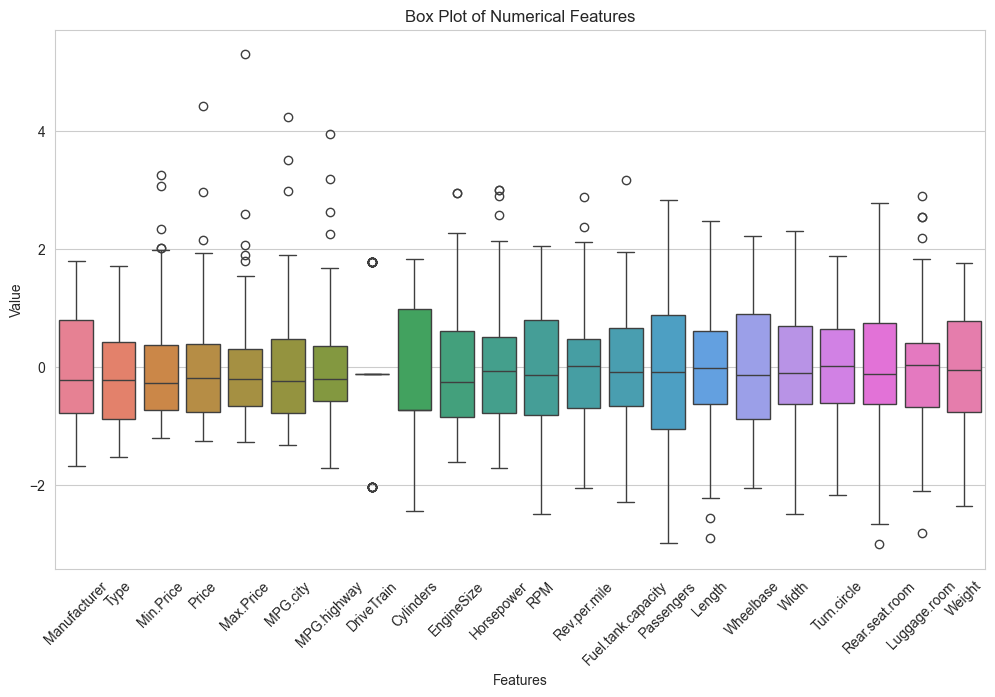

In [88]:
# 5 Write a function to normalize / scale the features either individually or jointly.
def scale_features(df):

    df_scale = df.copy()

    scaler = StandardScaler()
    float_column = df_scale.select_dtypes(include="float64").columns
    for column in float_column:
        df_scale[column] = scaler.fit_transform(df_scale[column].values.reshape(-1, 1))
    int_column = df_scale.select_dtypes(include="int64").columns
    for column in int_column:
        df_scale[column] = scaler.fit_transform(df_scale[column].values.reshape(-1, 1))
    return df_scale

# Scale the features
final_data = scale_features(encoded_data.reset_index(drop=True))


object_cols = final_data.select_dtypes(include="float64").columns
plt.figure(figsize=(12, 7))
sns.boxplot(data=final_data[object_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.ylabel("Value")
plt.xlabel("Features")
plt.show()







In [96]:
# Q6. Write a function to create a random split of the data into train, validation and test sets in the ratio of [70:20:10]
from sklearn.model_selection import train_test_split
def split_data(df):
    X = df.drop(columns=["Price"])  # Features (all columns except 'Price')
    y = df["Price"]

    # First, split the data into 70% training and 30% temporary (validation + test)
    X_train, X_temp, Y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

    # Then, split the temporary data into 20% validation and 10% test
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)
    return X_train, Y_train, X_val, y_val, X_test, y_test

X_train, Y_train, X_val, y_val, X_test, y_test = split_data(final_data)
print(X_train) #65
print(X_val) # 18
print(X_test) # 10

    Manufacturer         Model      Type  Min.Price  Max.Price  MPG.city  \
31     -0.551029        Escort  0.418243  -1.003095  -0.911397  0.113500   
77      1.127323           900 -1.526587   0.364897   1.385570 -0.423219   
9      -1.222369       DeVille -0.878310   1.824855   1.312650 -1.138845   
70      0.791653  Eighty-Eight -0.878310   0.272931   0.000098 -0.602126   
5      -1.334259       Century -0.230034  -0.336343  -0.419189 -0.065407   
..           ...           ...       ...        ...        ...       ...   
20     -0.886699       LeBaron -1.526587  -0.301856  -0.437419  0.113500   
60      0.455982        Cougar -0.230034  -0.255873  -0.637948 -0.602126   
71      0.903543         Laser  1.066519  -0.658223  -0.410075  0.113500   
14     -1.110479        Lumina -0.230034  -0.428309  -0.318925 -0.244313   
51      0.120312      Town_Car -0.878310   1.985795   1.449374 -0.781032   

    MPG.highway             AirBags  DriveTrain  Cylinders  ...  \
31     0.172352     